In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arff
import sys
sys.path.append("..")
import src.support as sp
import pickle

## 1. Lectura del conjunto de datos

In [72]:
with open('../data/dataset_31_credit-g.arff', 'r') as file:
    data = arff.load(file)

df_origen = pd.DataFrame(data['data'], columns=[attr[0] for attr in data['attributes']])

df = df_origen.copy()

In [73]:
pd.set_option('display.max_columns', None)
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [74]:
df.shape

(1000, 21)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [76]:
df.isnull().sum() / df.shape[0] * 100

checking_status           0.0
duration                  0.0
credit_history            0.0
purpose                   0.0
credit_amount             0.0
savings_status            0.0
employment                0.0
installment_commitment    0.0
personal_status           0.0
other_parties             0.0
residence_since           0.0
property_magnitude        0.0
age                       0.0
other_payment_plans       0.0
housing                   0.0
existing_credits          0.0
job                       0.0
num_dependents            0.0
own_telephone             0.0
foreign_worker            0.0
class                     0.0
dtype: float64

## 2. Exploración y preprocesado

### 2.1. Exploración

#### 2.1.1. Variable respuesta

In [77]:
df["class"].value_counts()

# Datos moderadamente desbalanceados

class
good    700
bad     300
Name: count, dtype: int64

#### 2.1.1. Variables numéricas

In [78]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [79]:
df["installment_commitment"].value_counts()

installment_commitment
4.0    476
2.0    231
3.0    157
1.0    136
Name: count, dtype: int64

In [80]:
df["residence_since"].value_counts()

residence_since
4.0    413
2.0    308
3.0    149
1.0    130
Name: count, dtype: int64

In [81]:
df["existing_credits"].value_counts()

existing_credits
1.0    633
2.0    333
3.0     28
4.0      6
Name: count, dtype: int64

In [82]:
df["num_dependents"].value_counts()

num_dependents
1.0    845
2.0    155
Name: count, dtype: int64

In [83]:
# Transformamos las columnas a tipo string porque son variables categóricas.

df["installment_commitment"] = df["installment_commitment"].astype("str")
df["residence_since"] = df["residence_since"].astype("str")
df["existing_credits"] = df["existing_credits"].astype("str")
df["num_dependents"] = df["num_dependents"].astype("str")

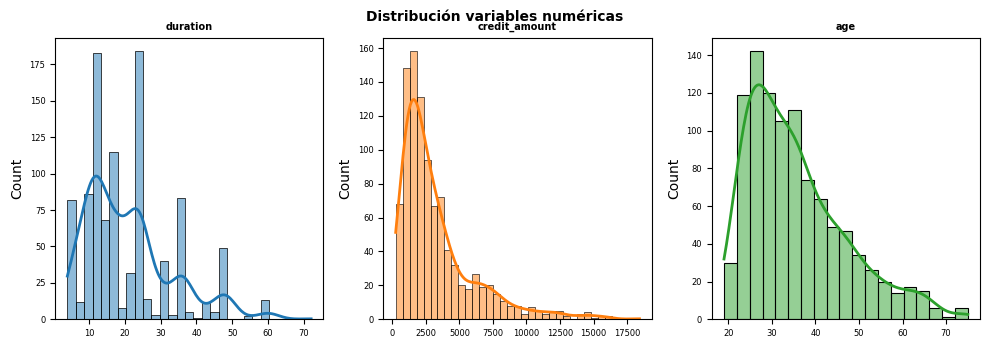

In [84]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data     = df,
        x        = colum,
        stat     = "count",
        kde      = True,
        color    = (list(plt.rcParams['axes.prop_cycle']))[i]["color"],
        line_kws = {'linewidth': 2},
        alpha    = 0.5,
        ax       = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

# Duración: la mayoría de créditos duran 1 o 2 años (12, 24 meses).
# Credit_amount: las cantidades pedidas tienen un sesgo hacia la izquierda.
# Age: los créditos los pide la gente más joven.
# Como hay sesgo, vamos a ver si hay outliers con boxplots.
# Importante la estandarización para que las predicciones no den más peso a la variable credit_amount.
# Si uso Standard Scaler, lo que haremos es restar la media y dividir por la desviación típica. 
# Si uso Robust Scaler, mejoramos la estandarización en el caso de haber muchos outliers porque en vez de trabajar con la media 
# y la desviación típica trabaja con la mediana y con el rango intercuartílico.
# Con MinMaxScaler lo que hacemos es llevar todos los valores entre 0 y 1. Es parecido a Standard Scaler.

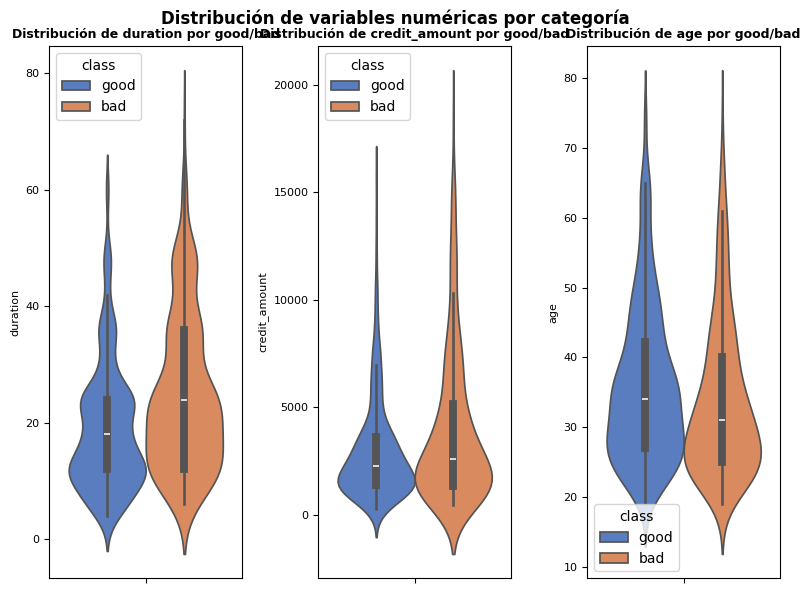

In [85]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 6))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.violinplot(
        hue=df["class"],
        y=df[colum], 
        ax=axes[i], 
        palette="muted", 
        density_norm="width", 
        inner="box",
    )
    axes[i].set_title(f"Distribución de {colum} por good/bad", fontsize=9, fontweight="bold")
    axes[i].tick_params(labelsize=8)
    axes[i].set_xlabel("")
    axes[i].set_ylabel(colum, fontsize=8)

# Eliminar ejes vacíos si hay menos variables que subplots
for j in range(len(columnas_numeric), len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.subplots_adjust(top=0.92)
fig.suptitle('Distribución de variables numéricas por categoría', fontsize=12, fontweight="bold")
plt.show();

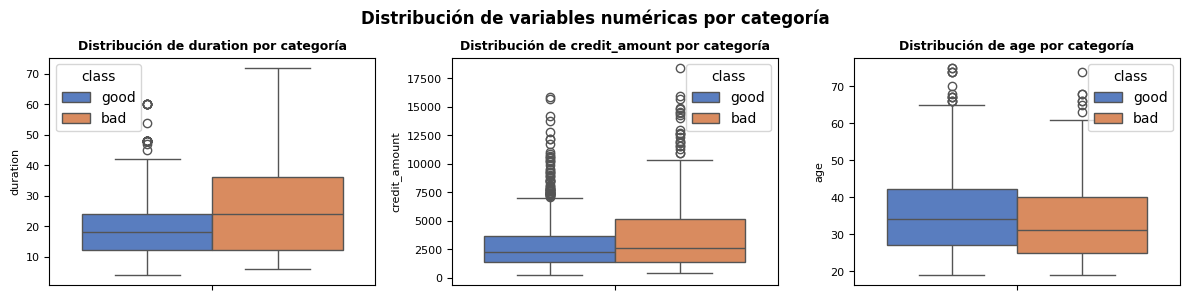

In [86]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.boxplot(
        hue=df['class'], 
        y=df[colum], 
        ax=axes[i], 
        palette="muted"
    )
    axes[i].set_title(f"Distribución de {colum} por categoría", fontsize=9, fontweight="bold")
    axes[i].tick_params(labelsize=8)
    axes[i].set_xlabel("")
    axes[i].set_ylabel(colum, fontsize=8)

# Eliminar ejes vacíos si hay menos variables que subplots
for j in range(len(columnas_numeric), len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.subplots_adjust(top=0.92)
fig.suptitle('Distribución de variables numéricas por categoría', fontsize=12, fontweight="bold")
plt.show()


In [87]:
# Probaremos a quitar outliers.

df_sin_outliers = df[(df["credit_amount"] <= 6000) & (df["age"] <= 70) & (df["duration"] <= 45)]

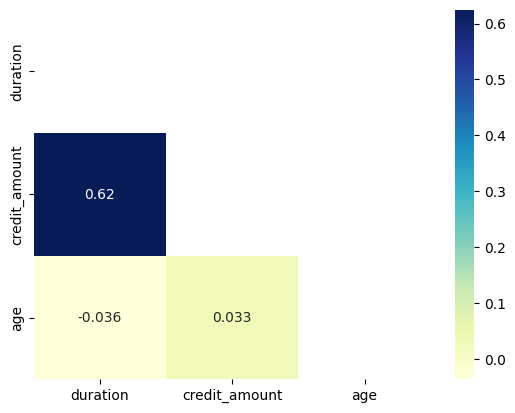

In [88]:
mask = np.triu(np.ones_like(df.select_dtypes(include=np.number).corr(), dtype = bool))
sns.heatmap(df.select_dtypes(include=np.number).corr(), 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True);

# La duración del crédito y la cantidad de crédito están relacionadas en un 0.62, tiene sentido.

#### 2.1.2. Variables categóricas

In [89]:
df.describe(include="object").T

,count,unique,top,freq
checking_status,1000,4,no checking,394
credit_history,1000,5,existing paid,530
purpose,1000,10,radio/tv,280
savings_status,1000,5,<100,603
employment,1000,5,1<=X<4,339
installment_commitment,1000,4,4.0,476
personal_status,1000,4,male single,548
other_parties,1000,3,none,907
residence_since,1000,4,4.0,413
property_magnitude,1000,4,car,332


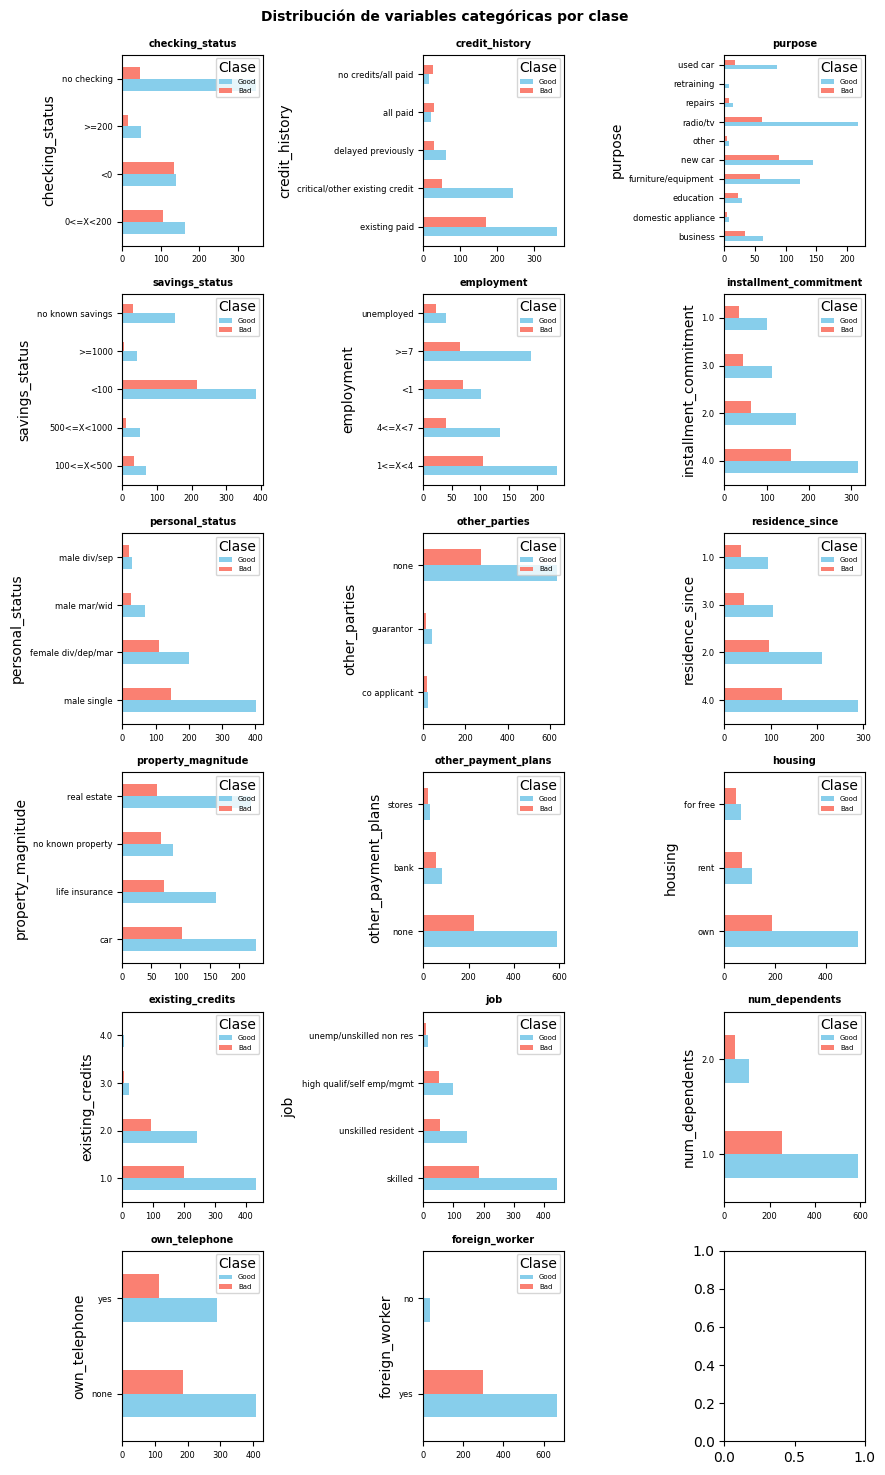

In [90]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(9, 15))
axes = axes.flat
columnas_object = df.select_dtypes(include=['object']).columns.drop("class")

for i, colum in enumerate(columnas_object):

    good_counts = df[df["class"] == "good"][colum].value_counts()
    bad_counts = df[df["class"] == "bad"][colum].value_counts()

    # Combinar los valores en un DataFrame
    counts_df = pd.DataFrame({
        "Good": good_counts,
        "Bad": bad_counts
    }).fillna(0)

    # Graficar
    counts_df.plot(kind="barh", ax=axes[i], color=["skyblue", "salmon"])

    # Personalización del gráfico
    axes[i].set_title(colum, fontsize=7, fontweight="bold")
    axes[i].tick_params(labelsize=6)
    axes[i].set_xlabel("")
    axes[i].legend(title="Clase", fontsize=5, loc="upper right")

# Ajustar diseño general
fig.tight_layout()
plt.subplots_adjust(top=0.95)
fig.suptitle('Distribución de variables categóricas por clase',
             fontsize=10, fontweight="bold")
plt.show()


In [91]:
# Al hacer la validación cruzada es posible que algunas particiones no tengan ninguna observación de dicha clase.
# 1. Purpose: crear una categoría Other para los valores más pequeños.
# 2. Other Parties: Reorganizar entre Yes / No
# 3. Other Payment Plans: Podemos reorganizar la clasifación entre Yes / No.
# 4. Existing_credits: Reorganizar en 1 y >=2.
# 5. Foreign_worker: trabajar únicamente con personas extranjeras.

In [92]:
df_grouped = df.copy()

In [93]:
sp.reorganizar(df_grouped, "purpose", "other", 5)
sp.reorganizar(df_grouped, "other_parties", "Yes", 7)
sp.reorganizar(df_grouped, "other_payment_plans", "Yes", 15)
sp.reorganizar(df_grouped, "existing_credits", ">=2", 50)

c:\Users\User\OneDrive\Escritorio\ML\Proyecto 2 - Fraude\notebooks\../src\support.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if float(df[df[columna] == value].count()[0]) / df.shape[0] *100 < ajuste:
c:\Users\User\OneDrive\Escritorio\ML\Proyecto 2 - Fraude\notebooks\../src\support.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if float(df[df[columna] == value].count()[0]) / df.shape[0] *100 < ajuste:
c:\Users\User\OneDrive\Escritorio\ML\Proyecto 2 - Fraude\notebooks\../src\support.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will 

In [94]:
df_grouped = df_grouped[df_grouped["foreign_worker"] == "yes"]

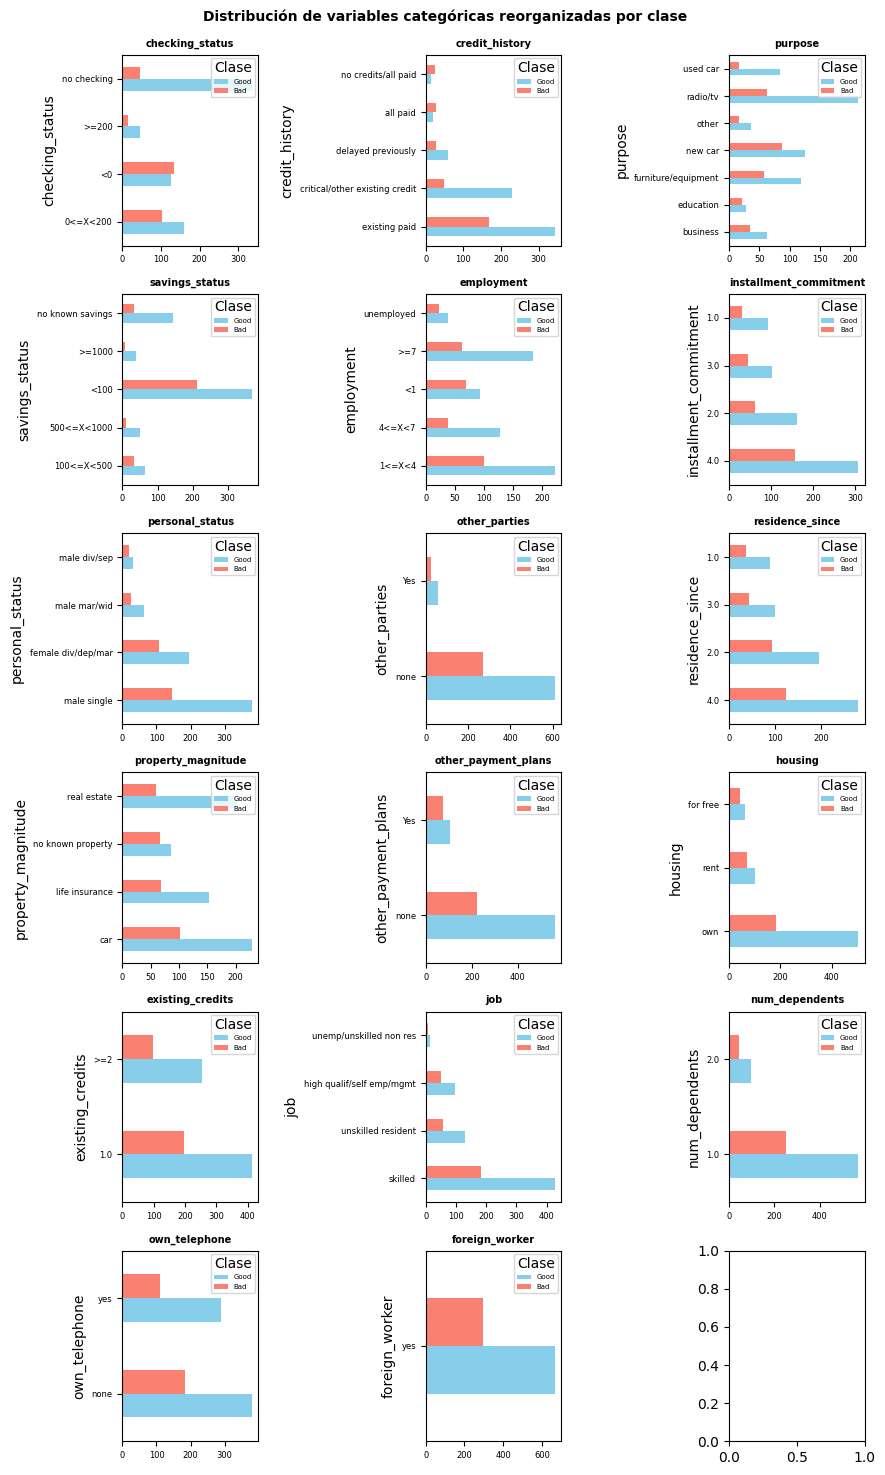

In [97]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(9, 15))
axes = axes.flat
columnas_object = df_grouped.select_dtypes(include=['object']).columns.drop("class")

for i, colum in enumerate(columnas_object):

    good_counts = df_grouped[df_grouped["class"] == "good"][colum].value_counts()
    bad_counts = df_grouped[df_grouped["class"] == "bad"][colum].value_counts()

    # Combinar los valores en un DataFrame
    counts_df = pd.DataFrame({
        "Good": good_counts,
        "Bad": bad_counts
    }).fillna(0)

    # Graficar
    counts_df.plot(kind="barh", ax=axes[i], color=["skyblue", "salmon"])

    # Personalización del gráfico
    axes[i].set_title(colum, fontsize=7, fontweight="bold")
    axes[i].tick_params(labelsize=6)
    axes[i].set_xlabel("")
    axes[i].legend(title="Clase", fontsize=5, loc="upper right")

# Ajustar diseño general
fig.tight_layout()
plt.subplots_adjust(top=0.95)
fig.suptitle('Distribución de variables categóricas reorganizadas por clase',
             fontsize=10, fontweight="bold")
plt.show()

In [96]:
# df.drop(labels="foreign_worker", axis=1, inplace=True)

## 3. Posibles Datasets

In [99]:
df.to_pickle("../data/clean")
df_grouped.to_pickle("../data/clean_grouped")
df_sin_outliers.to_pickle("../data/clean_sin_outliers")